In [1]:
# Loading the dataset function
from dataset_functions import *
from PCA_functions import *
%matplotlib inline

/opt/conda/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Loading Dataset
dataset_path = r"/home/arbash44/coding/hsi/PCBDataset/"
#HSI, HSI_general_masks, HSI_monoseg_masks, RGB, RGB_monoseg_masks, RGB_general_masks, PCB_Masks = read_dataset(dataset_path)
HSI, HSI_general_masks, HSI_monoseg_masks, _, _, _, _ = read_dataset(dataset_path)

100%|██████████| 53/53 [00:03<00:00, 14.63it/s]

Dataset loading is complete.


In [3]:
# Clipping values outside [0, 1] range
HSI = clipping_neg_pos(HSI)

100%|██████████| 53/53 [00:31<00:00,  1.70it/s]

Clipping data is complete. No more negative values.


In [4]:
# Discarding the first 10 bands (noisy)
HSI = slicing(HSI,10)
HSI[0].shape

100%|██████████| 53/53 [00:01<00:00, 30.10it/s]

Skipping first 10 bands
The HS cubes have 214 channels, the first 10 are sliced out.


(272, 499, 214)

In [5]:
# HSI manual dataset splitting: 33% training - 5% Validation - 56% Testing
training = [1,3,8,11,17,22,23,24,25,32,34,44,45,47,49,50,52,53]
validation = [18, 37, 42] 
testing = [2, 5, 6, 7, 9, 10, 12, 13, 14, 15, 16, 19, 20, 21, 26, 27, 28, 29, 30, 31, 33, 36, 38, 39, 40, 41, 43, 46, 48, 51]

# Data Generation

In [6]:
# Creating & Augmenting the training HS cubes

# For working with general ground truth change 'HSI_monoseg_masks' to 'HSI_general_masks' !!
Training_cubes, Training_masks = Generate_Training_data(training, HSI, HSI_general_masks)
len(Training_cubes), Training_cubes[0].shape, len(Training_masks), np.min(Training_cubes[0]), np.max(Training_cubes[0])

(126, (272, 499, 214), 126, 0.0, 1.0)

In [7]:
# Validation cubes

# For working with general ground truth change 'HSI_monoseg_masks' to 'HSI_general_masks' !!
Validation_cubes, Validation_masks = Generate_data(validation, HSI, HSI_general_masks)
len(Validation_cubes), Validation_cubes[0].shape, np.min(Validation_cubes[0]), np.max(Validation_cubes[0])

(3, (370, 560, 214), 0.0, 1.0)

In [8]:
# Test cubes

# For working with general ground truth change 'HSI_monoseg_masks' to 'HSI_general_masks' !!
Testing_cubes, Testing_masks = Generate_data(testing, HSI, HSI_general_masks)
len(Testing_cubes), Testing_cubes[0].shape, len(Testing_masks), np.min(Testing_cubes[0]), np.max(Testing_cubes[0])

(30, (1100, 1024, 214), 30, 0.0, 1.0)

# PCA

In [ ]:
# Training PCA

# Create an empty list to store the PCA-transformed training data
Training_PCA = []  

# Iterate over the training cubes
for i, img in enumerate(Training_cubes):  
    
    # Print the current iteration number and the total number of training cubes
    print(i, len(Training_cubes))  

    # Apply PCA to the current cube and append the transformed data to the list
    Training_PCA.append(PCA2(img, 3))  

# Visualize the first PCA-transformed cube
plt.imshow(Training_PCA[0][:, :, :3])  # Display the first three channels of the transformed cube

# Display the number of cubes and the shape of the transformed data
print(len(Training_PCA), Training_PCA[0].shape) 

In [10]:
# Saving training PCA 

for i, (cube, mask) in enumerate(zip(Training_PCA, Training_masks)):
    """
    Iterate over the PCA-transformed training cubes and their corresponding masks, saving them to separate files

    Parameters:
        i (int): Iteration index
        cube (numpy.ndarray): PCA-transformed training cube
        mask (numpy.ndarray): Corresponding training mask
    """
    
    # Define saving path
    saving_path =  "Saving path"     # e.g.,: /home/PCBvision/PCA/train/
    
    # Construct the filename for the PCA-transformed cube
    filename = f"{saving_path}{i}.hdr"

    # Save the PCA-transformed cube to an ENVI header file
    envi.save_image(filename, cube, dtype=np.float32, ext=None, force=True)

    # Construct the filename for the training mask
    filename = f"{saving_path}{i}.npy"

    # Save the training mask to a NumPy file
    np.save(filename, mask)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


3 (370, 560, 3)


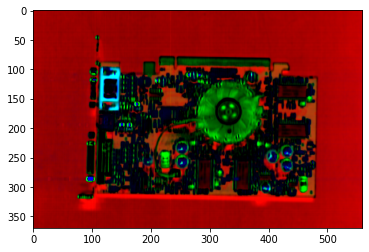

In [11]:
# Validation PCA

# Create an empty list to store the PCA-transformed validation data
Validation_PCA = []  

# Iterate over the validation cubes
for i, val_img in enumerate(Validation_cubes):  

    # Apply PCA to the current cube and append the transformed data to the list
    Validation_PCA.append(PCA2(val_img, 3))  

# Display the first three channels of the transformed validation cube
plt.imshow(Validation_PCA[0][:, :, :3])  

# Print the length and shape of the PCA-transformed validation data
print(len(Validation_PCA), Validation_PCA[0].shape)  

In [12]:
# Saving validation PCA 

for i, (cube, mask) in enumerate(zip(Validation_PCA, Validation_masks)):
    """
    Save the PCA-transformed validation data and their corresponding masks to separate files

    Parameters:
        i (int): Iteration index
        cube (numpy.ndarray): PCA-transformed validation cube
        mask (numpy.ndarray): Corresponding validation mask
    """
    # Define saving path
    saving_path =  "Saving path"     # e.g.,: /home/PCBvision/PCA/validation/
    
    # Construct the filename for the PCA-transformed cube
    filename = f"{saving_path}{i}.hdr"

    # Save the PCA-transformed cube to an ENVI header file
    envi.save_image(filename, cube, dtype=np.float32, ext=None, force=True)

    # Construct the filename for the validation mask
    filename = f"{saving_path}{i}.npy"

    # Save the validation mask to a NumPy file
    np.save(filename, mask)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


30 (1100, 1024, 3)


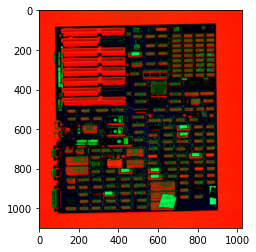

In [13]:
# Test PCA

# Create an empty list to store the PCA-transformed testing data
Testing_PCA = []  

# Iterate over the testing cubes
for i, test_img in enumerate(Testing_cubes):  

    # Apply PCA to the current cube and append the transformed data to the list
    Testing_PCA.append(PCA2(test_img, 3))  

# Display the first three channels of the transformed testing cube
plt.imshow(Testing_PCA[0][:, :, :3])  

# Print the length and shape of the PCA-transformed testing data
print(len(Testing_PCA), Testing_PCA[0].shape)  

In [14]:
# Saving testing PCA 

for i, (cube, mask) in enumerate(zip(Testing_PCA, Testing_masks)):
    """
    Save the PCA-transformed testing data and their corresponding masks to separate files.

    Parameters:
        i (int): Iteration index
        cube (numpy.ndarray): PCA-transformed testing cube
        mask (numpy.ndarray): Corresponding testing mask
    """
    # Define saving path
    saving_path =  "Saving Path"     # e.g.,: /home/PCBvision/PCA/validation/
    
    # Construct the filename for the PCA-transformed cube
    filename = f"{saving_path}{i}.hdr"
    
    # Save the PCA-transformed cube to an ENVI header file
    envi.save_image(filename, cube, dtype=np.float32, ext=None, force=True)

    # Construct the filename for the testing mask
    filename = f"{saving_path}{i}.npy"

    # Save the testing mask to a NumPy file
    np.save(filename, mask)